# Cities for Young Adults analysis


The datasets used in this presentation were from Office for National Statistics and represent Gross Value added in terms of Nomenclature of Territorial Units for Statistics (NUTS). More information on NUTS3 can be found here:

https://en.wikipedia.org/wiki/Nomenclature_of_Territorial_Units_for_Statistics

The second dataset used in this presentation is from The Best Place to Live as a Young Adult, evaluated by Comparethemarket. For the full dataset, the link can be found here:

https://www.comparethemarket.com/home-insurance/content/best-uk-city-for-young-adults/

For this project, I first used Python and BeautifulSoup to scrape the data from wikipedia. For the comparethemarket dataset, I converted it to an Excel file before importing it.

Then, I used Python to aggregate summary statistics within Jupyter Notebook. In doing so, I discovered. 

* Which regions have the highest proportion of young adults?
* Which regions have the highest 4G coverage?
* What was the average score per region?
* Which regions and cities spend the highest proportion of their salary on rent?
* Which variables have the highest correlation with Mental wellbeing?

After this, I wanted to focus more on the economic output of each region. To achieve this, I performed an inner join to merge the tables into a single dataframe. I wanted to discover, 

* Does a higher value of rent correlate with a higher gross value added per head?
* Is there a correlation between the Young adult percentage and productivity of a city?
* Are cities with a higher Gross Value added ranked as better for young adults?


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_UK_cities_by_GVA'
table_class = 'wikitable sortable jquery-tablesorter'
response = requests.get(wiki_url)
print(response.status_code)

200


This 200 tells us that it is legal to download the contents of the table.

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
all_tables = soup.findAll('table', {'class': 'wikitable'})
wiki_tables = []
for i in all_tables:
    wiki_tables.append(i)
city_table = wiki_tables[-1]
city_table

<table class="wikitable sortable" style="float:center; font-size:85%; margin-left:15px;">
<caption><i>GVA and GVA per head for 2015</i>
</caption>
<tbody><tr>
<th>Rank</th>
<th>City/Conurbation</th>
<th>GVA <br/>(£ millions)</th>
<th>Growth (%) <br/>2009-15</th>
<th>GVA <br/>per head</th>
<th>GVA per employee <br/>(productivity)
</th></tr>
<tr style="text-align:right;">
<td>1</td>
<td style="text-align:left;"><a href="/wiki/Economy_of_London" title="Economy of London">London</a><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[note 1]</a></sup></td>
<td>378,424</td>
<td style="text-align:left;"><img alt="Increase" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" 

In [5]:
df = pd.read_html(str(city_table))
#convert list to dataframe
df = pd.DataFrame(df[0])
#clean the data 
df = df.rename(columns={'City/Conurbation': 'City'})
city_list = []
for city in df['City']:
    city_list.append(str(city).replace('[','').replace(']','').replace('note','').replace('1','').replace('2', '').replace('3', '').replace('Greater Manchester', 'Manchester').replace('Cardiff and Vale of Glamorgan', 'Cardiff').strip(' '))
df['City'] = city_list


In [6]:
df

,Rank,City,GVA (£ millions),Growth (%) 2009-15,GVA per head,GVA per employee (productivity)
0,1,London,378424,30.6,"£ 43,629","£ 70,392"
1,2,Manchester,59606,17.5,"£ 21,626","£ 44,974"
2,3,Birmingham,24790,21.7,"£ 22,307","£ 45,934"
3,4,Leeds,21260,14.6,"£ 27,466","£ 45,790"
4,5,Glasgow,19624,12.8,"£ 32,305","£ 46,914"
5,6,Edinburgh,18437,10.6,"£ 36,963","£ 55,196"
6,7,Tyneside,18224,21.1,"£ 21,566","£ 42,788"
7,8,Bristol,13862,22.4,"£ 30,850","£ 48,090"
8,9,Sheffield,11300,11.2,"£ 19,833","£ 41,695"
9,10,Cardiff,11044,12.4,"£ 22,783","£ 42,181"


In [7]:
young_adult_table = 'https://www.comparethemarket.com/home-insurance/content/best-uk-city-for-young-adults/'

In [8]:
#Import second dataframe from excel file 
xl = pd.ExcelFile("young_adult_rankings.xlsx")
df2 = xl.parse('Sheet1')
df2

,Rank,City,Region,Young adult population,Rent,Salary,Mental wellbeing,4G coverage,Nightlife,Total Score / 100
0,1,Edinburgh,Scotland,0.3256,714,25720,25.27,0.8638,12,72.05
1,2,Reading,South East,0.2999,1101,27126,25.47,0.9395,9,71.40
2,3,Derby,East Midlands,0.2556,654,26000,25.19,0.8847,11,69.00
3,4,Manchester,North West,0.3857,689,21896,25.23,0.8971,10,66.13
4,5,Bristol,South West,0.3535,829,24122,25.28,0.8323,9,65.44
5,6,Aberdeen,Scotland,0.3143,714,24676,25.27,0.8077,8,65.28
6,7,Glasgow,Scotland,0.3289,714,22325,25.27,0.9102,10,65.27
7,8,Liverpool,North West,0.3265,689,22338,25.23,0.8987,13,64.96
8,9,Brighton and Hove,South East,0.3332,1101,24469,25.47,0.8073,13,63.22
9,10,Newcastle upon Tyne,North East,0.3531,567,22054,24.84,0.8966,12,62.42


### Which regions have the highest proportion of young adults?

In [9]:
df2.groupby('Region')['Young adult population'].mean().sort_values(ascending=False)

Region
North West                  0.356100
North East                  0.353100
Wales                       0.329600
South East                  0.327675
Scotland                    0.322933
East Midlands               0.301100
London                      0.285400
South West                  0.283967
West Midlands               0.283225
Yorkshire and the Humber    0.279900
East                        0.263400
Name: Young adult population, dtype: float64

* The North West has the highest proportion of young adults, followed closely by the North East. The East has the smallest proportion. 
* London has 2 percent fewer Young adults than the national average.

In [10]:
df2['Young adult population'].mean() - 0.285400

0.01931428571428573

### Which regions have the highest 4G coverage?

In [11]:
df2['4G coverage'].mean()

0.849907142857143

In [12]:
df2.groupby('Region')['4G coverage'].mean().sort_values(ascending=False)

Region
London                      0.930600
East                        0.902900
North West                  0.897900
North East                  0.896600
East Midlands               0.880425
Scotland                    0.860567
South East                  0.857550
South West                  0.830867
West Midlands               0.818650
Yorkshire and the Humber    0.814975
Wales                       0.710800
Name: 4G coverage, dtype: float64

* London has by far the highest 4G coverage with 93%
* The lowest is Wales with 71%
* The average across the UK is 85%

### What was the average score per region?

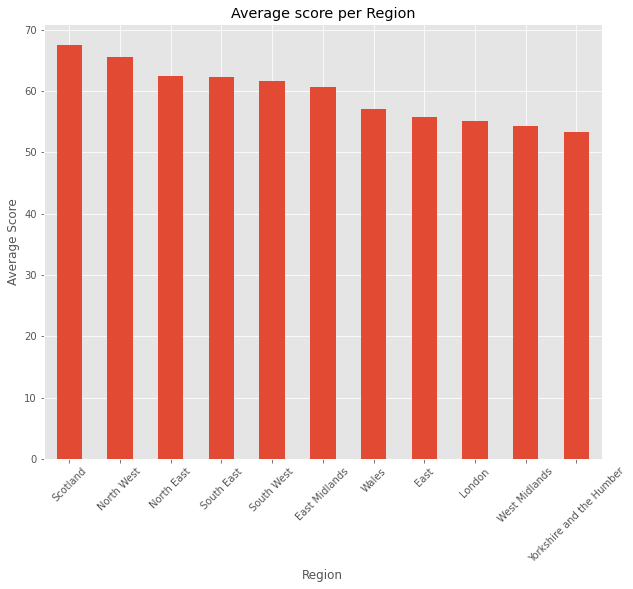

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
df2.groupby('Region')['Total Score / 100'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average score per Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.xticks(rotation=45);

* Scotland receives the highest score per Region, with Yorkshire aad the Humber with the lowest average score
* The East Midlands is the region closest to the median score
* London scored much lower than the average score with 55 points on average

### Which regions and cities spend the highest proportion of their salary on rent?

In [14]:
# Create a new column as a calculated field to store values for percentage of salary spent on rent
df2['Percent of Salary on Rent'] = df2['Rent'] / (df2['Salary'] / 12) * 100

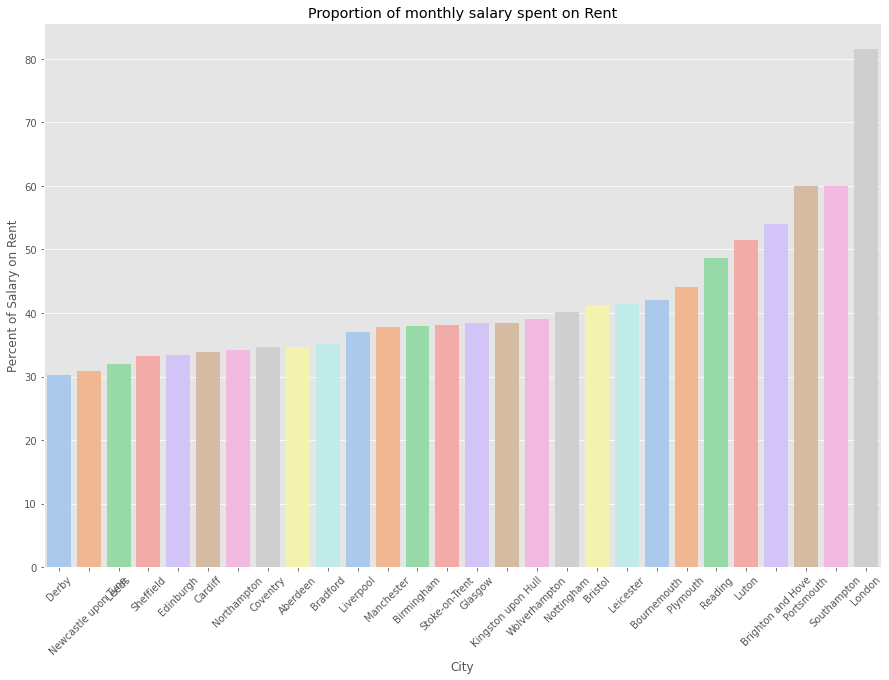

In [15]:
df2
plt.figure(figsize=(15, 10))
plt.title('Proportion of monthly salary spent on Rent')
sns.barplot(x = 'City', y = 'Percent of Salary on Rent', data = df2, order=df2.sort_values('Percent of Salary on Rent').City, palette='pastel')
plt.xticks(rotation=45);

* In London, a eye-watering 82% of monthly salary in spent on rent.
* At first glance, it would seem the most expensive cities are predominantly in the South of England, occupying the majority of the worst offenders 
* Conversely, the those living in the North of England is the cheapest, almost 60% cheaper than living in the South/London

### Which variables have the highest correlation with Mental wellbeing?



In [16]:
df2.corr()

,Rank,Young adult population,Rent,Salary,Mental wellbeing,4G coverage,Nightlife,Total Score / 100,Percent of Salary on Rent
Rank,1.000000,-0.470033,0.008823,-0.421002,-0.413355,-0.349149,-0.425728,-0.985326,0.136871
Young adult population,-0.470033,1.000000,-0.017199,-0.104809,0.144583,0.103711,0.136514,0.447478,0.034250
Rent,0.008823,-0.017199,1.000000,0.644987,0.433131,0.268219,-0.065455,-0.006664,0.944887
Salary,-0.421002,-0.104809,0.644987,1.000000,0.212773,0.085814,-0.018722,0.438366,0.379133
Mental wellbeing,-0.413355,0.144583,0.433131,0.212773,1.000000,0.229536,0.191729,0.414249,0.529396
4G coverage,-0.349149,0.103711,0.268219,0.085814,0.229536,1.000000,0.000764,0.364725,0.275997
Nightlife,-0.425728,0.136514,-0.065455,-0.018722,0.191729,0.000764,1.000000,0.434517,-0.051880
Total Score / 100,-0.985326,0.447478,-0.006664,0.438366,0.414249,0.364725,0.434517,1.000000,-0.138168
Percent of Salary on Rent,0.136871,0.034250,0.944887,0.379133,0.529396,0.275997,-0.051880,-0.138168,1.000000


* Rent has a strong positive relationship with mental wellbeing, so it seems that the higher the rent of a city, the more likely it is that a person will have a higher mental wellbeing. But this is a weak correlation.
* The strongest correlation is between Percent of Salary on Rent and Mental Wellbeing, with a pearson score of 0.529. 
* This is curious, since it would appear that a higher proportion of salary spent of rent correlates positively with a happier individual.

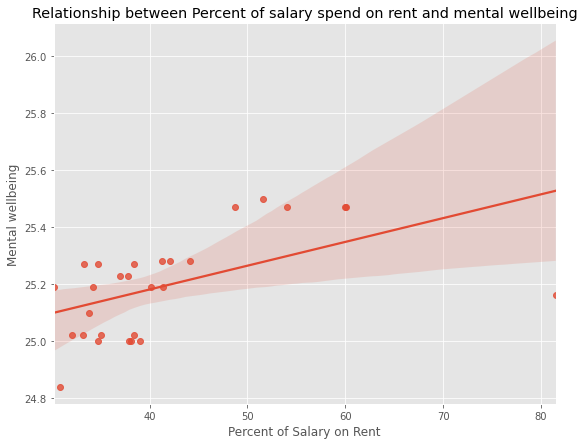

In [17]:
plt.figure(figsize=(9, 7));
plt.title('Relationship between Percent of salary spend on rent and mental wellbeing');
sns.regplot(x = 'Percent of Salary on Rent', y = 'Mental wellbeing', data = df2);

### Does a higher value of rent correlate with a higher gross value added per head?

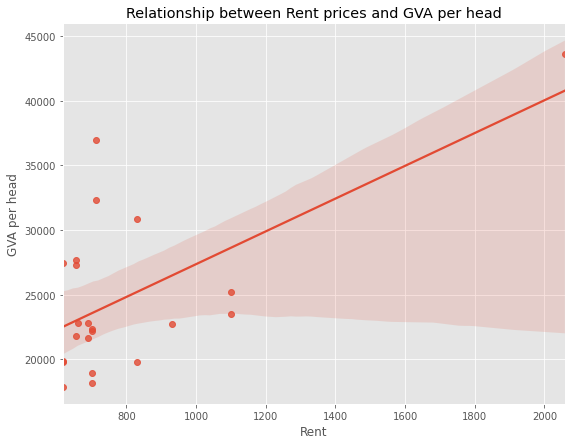

In [23]:
# Clean the data and merge the dataframes
df3 = df.merge(df2, on='City', how='inner')
df3.dtypes
def convert_dtypes(col):
    return col.replace('£', '').replace(',', '')
    
    

df3['GVA per head'] = df3['GVA per head'].apply(convert_dtypes)
df3['GVA per head'] = df3['GVA per head'].astype('float64')
df3['GVA per employee (productivity)'] = df3['GVA per employee (productivity)'].apply(convert_dtypes)
df3['GVA per employee (productivity)'] = df3['GVA per employee (productivity)'].astype('float64')
df3
plt.figure(figsize=(9, 7));
sns.regplot(x = 'Rent', y = 'GVA per head', data = df3);
plt.title('Relationship between Rent prices and GVA per head')
plt.xlabel('Rent')
plt.ylabel('GVA per head');

* From the graph above, there is no clear positive correlation between rent prices and Gross Value Added per head.
* With regard to Rent prices, London is an outlier. Although it has the highest GVA per head by far. 
* Edinburgh has the has a the highest GVA per head as well as having some of the lowest rent prices in the UK.

### Is there a correlation between the Young adult percentage and productivity of a city?

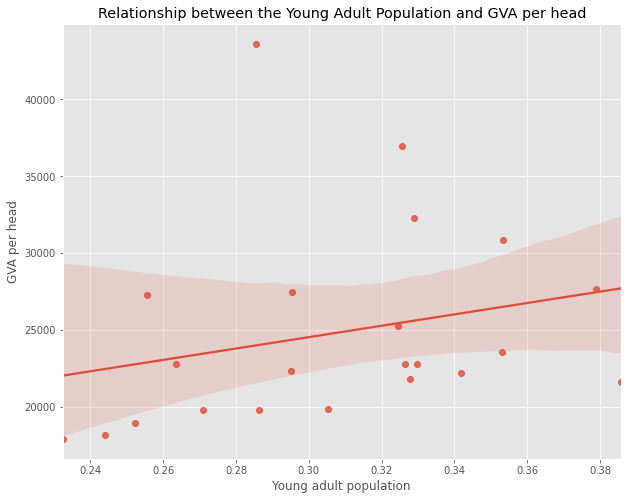

In [26]:
plt.figure(figsize=(10, 8))
sns.regplot(x = 'Young adult population', y = 'GVA per head', data=df3);
plt.title('Relationship between the Young Adult Population and GVA per head');



* There is a weak positive correlation between the percentage of young adults a city has and the Gross Value added per person 
* Manchester has the highest Young adult population 

In [29]:
df3.sort_values('Young adult population', ascending=False);

### Conclusion 

* The North West has the highest proportion of young adults, followed closely by the North East. The East has the smallest proportion. 
* London has 2 percent fewer Young adults than the national average.
* London has by far the highest 4G coverage with 93% coverage
* The lowest coverage is Wales with 71%
* The average coverage across the UK is 85%
* Scotland receives the highest score per Region, with Yorkshire aad the Humber with the lowest average score
* The East Midlands is the region closest to the median score
* London scored much lower than the average score with 55 points on average
* In London, a eye-watering 82% of monthly salary in spent on rent.
* At first glance, it would seem the most expensive cities are predominantly in the South of England, occupying the majority of the worst offenders 
* Conversely, the those living in the North of England get by the cheapest, almost 60% cheaper than living in the South/London
* Rent has a strong positive relationship with mental wellbeing, so it seems that the higher the rent of a city, the more likely it is that a person will have a higher mental wellbeing. But this is a weak correlation.
* There is no clear positive correlation between rent prices and Gross Value Added per head.
* Edinburgh has the has a the highest GVA per head as well as having some of the lowest rent prices in the UK.

### Best city to live in the UK as young adult?
* Edinburgh is first, having some of the lowest rent prices and best score per region. It's also one of the most pro
* 